In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('wine_types.csv')
wine_X = wine.drop("Type", axis=1)
y = wine["Type"].copy()

wine

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [4]:
scaler = StandardScaler()
pca = PCA(n_components = 0.9)
knn = KNeighborsClassifier(n_neighbors=8)

pipe = Pipeline([
        ('scaler', scaler),
        ('reducer', pca),
        ('classifier', knn)])
print(pipe['reducer'])

PCA(n_components=0.9)


In [5]:
wine_X_std = pipe['scaler'].fit_transform(wine_X)
transformed_X = pipe['reducer'].fit_transform(wine_X_std)

In [6]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749])

In [16]:
len(transformed_X), len(y)

(178, 178)

In [23]:
from sklearn.model_selection import train_test_split

#X_train, y_train, X_test, y_test = train_test_split(transformed_X, y, test_size=.3)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=.3)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [24]:
import seaborn as sns

<Axes: >

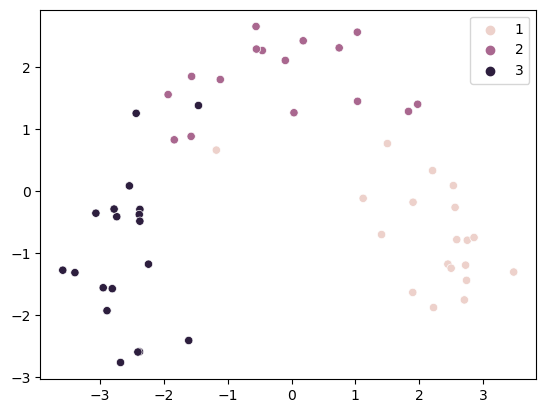

In [25]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9074074074074074

<Axes: >

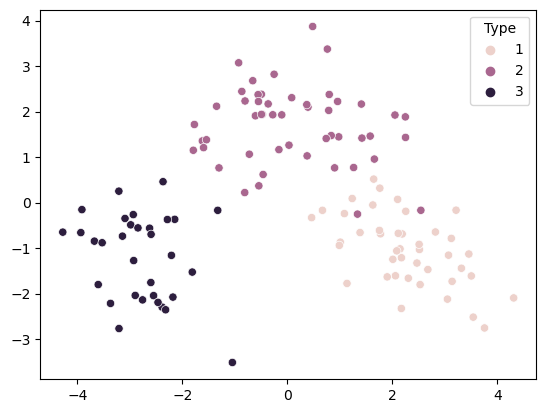

In [31]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)